In [1]:
import pandas as pd
import re

df_notes = pd.read_csv('df_430_radiology_notes.csv')

def clean(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\x20-\x7E]', '', text)
    return text.strip()

df_notes['clean_text'] = df_notes['TEXT'].apply(clean)

In [5]:
import spacy.cli

spacy.cli.download("en_core_web_sm")


import spacy
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


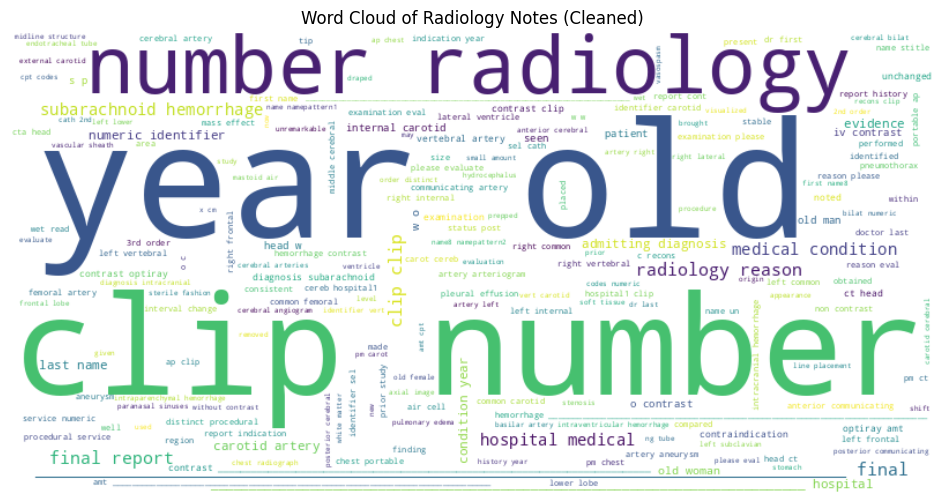

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join(df_notes['clean_text'])
wc = WordCloud(width=800, height=400, background_color="white")\
       .generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Radiology Notes (Cleaned)")
plt.show()

In [7]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm", disable=["parser","tagger","lemmatizer"])
nlp.enable_pipe("ner")

doc = nlp(df_notes['clean_text'].iloc[0])

displacy.render(doc, style="ent", jupyter=True, options={"distance": 100})

In [8]:
%pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bc5cdr_md-0.5.4.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.2/920.2 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 97.9 MB/s eta 0:00:00
  Created wheel for en_ner_bc5cdr_md: filename=en_ner_bc5cdr_md-0.5.4-py3-none-any.whl size=119787677 sha256=09b7f81c8eda530fb29e90037b5a5d2cc0892b9012bdc7819c84225f7a107cf3
  Stored in directory: /root/.cache/pip/wheels/6e/a6/d6/bd15a41e2ff02a62f0a0a48dddbc07d048307db7199a1538f7
Successfully built en_ner_bc5cdr_md
  Attempting uninstall: blis
    Found existing installation: blis 1.3.0
    Uninstalling blis-1.3.0:
      Successfully uninstalled blis-1.3.0
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.6
    Uninstalling thinc-8.3.6:
      Successfully uninstalled thinc-8.3.6
  Attempting uninstall: spacy
  

In [9]:
import spacy

nlp_bc5 = spacy.load("en_ner_bc5cdr_md")

doc = nlp_bc5(df_notes['clean_text'].iloc[0])
print([(ent.text, ent.label_) for ent in doc.ents])

/usr/local/lib/python3.11/dist-packages/spacy/language.py:2233: FutureWarning: Possible set union at position 6328
  return util.to_bytes(serializers, exclude)


[('l-spine', 'CHEMICAL'), ('fracture', 'DISEASE'), ('dementia', 'DISEASE'), ('ich,', 'DISEASE'), ('constipation', 'DISEASE'), ('fracture', 'DISEASE'), ('compression fracture', 'DISEASE'), ('compression fracture', 'DISEASE'), ("paget's disease", 'DISEASE')]


In [11]:
%pip install scispacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 26.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/spacy/util.py:922: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.5.4) was trained with spaCy v3.7.4 and may not be 100% compatible with the current version (3.8.7). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  def get_model_meta(path: Union[str, Path]) -> Dict[str, Any]:


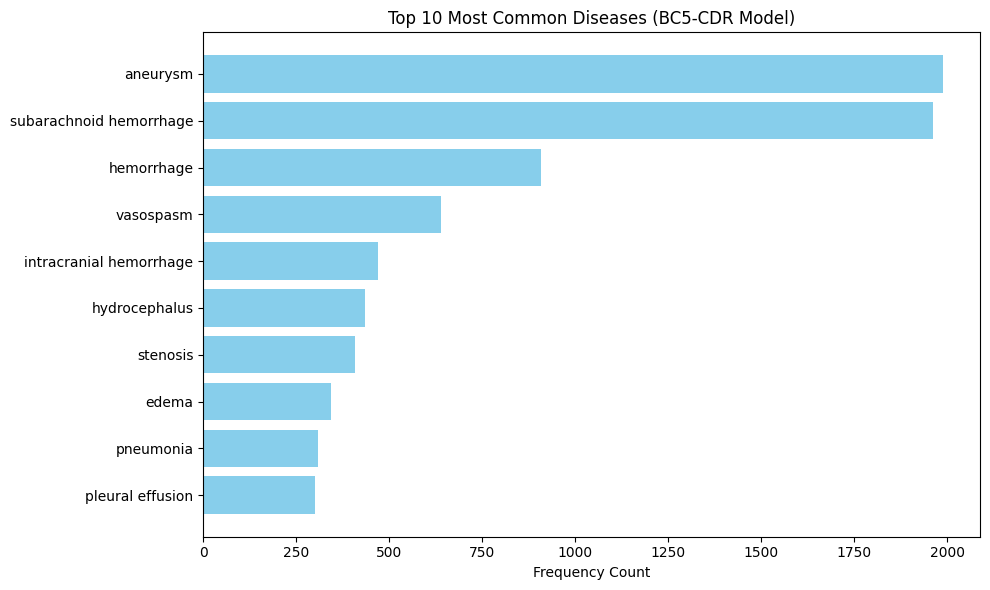

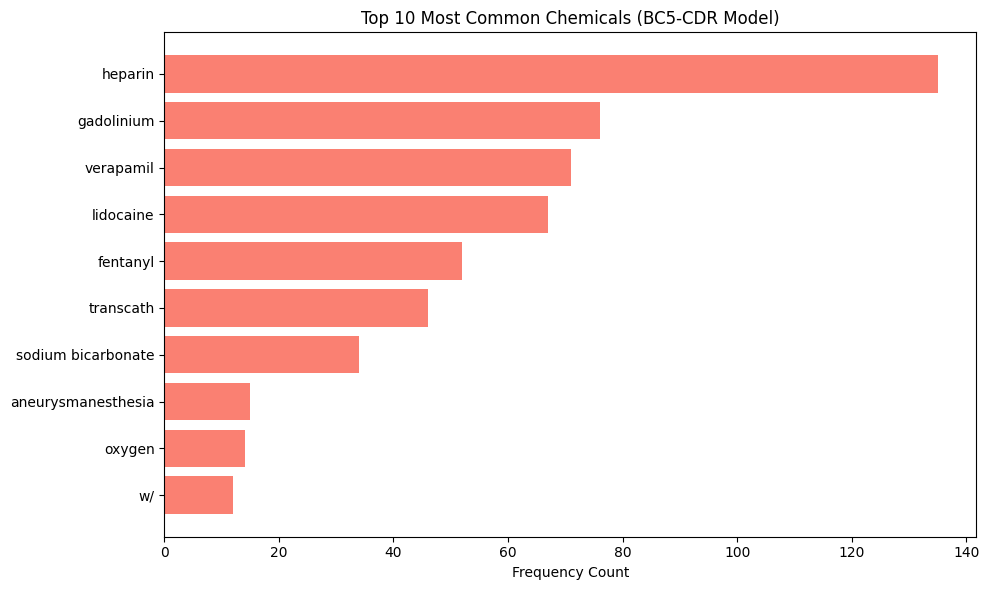

In [13]:
import spacy
import scispacy
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd


nlp_clin = spacy.load("en_ner_bc5cdr_md", disable=["parser", "tagger", "lemmatizer"])

sample_df     = df_notes.sample(min(2000, len(df_notes)), random_state=42)
sample_texts  = sample_df['clean_text'].tolist()

docs_clin = list(nlp_clin.pipe(sample_texts, batch_size=200))

diseases = [ent.text.lower() for doc in docs_clin for ent in doc.ents if ent.label_ == 'DISEASE']
chemicals = [ent.text.lower() for doc in docs_clin for ent in doc.ents if ent.label_ == 'CHEMICAL']


top_10_diseases = Counter(diseases).most_common(10)
top_10_chemicals = Counter(chemicals).most_common(10)


disease_names, disease_counts = zip(*top_10_diseases)
chemical_names, chemical_counts = zip(*top_10_chemicals)
plt.figure(figsize=(10, 6))
plt.barh(disease_names, disease_counts, color='skyblue')
plt.xlabel("Frequency Count")
plt.title("Top 10 Most Common Diseases (BC5-CDR Model)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(chemical_names, chemical_counts, color='salmon')
plt.xlabel("Frequency Count")
plt.title("Top 10 Most Common Chemicals (BC5-CDR Model)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [2]:
%pip install gensim


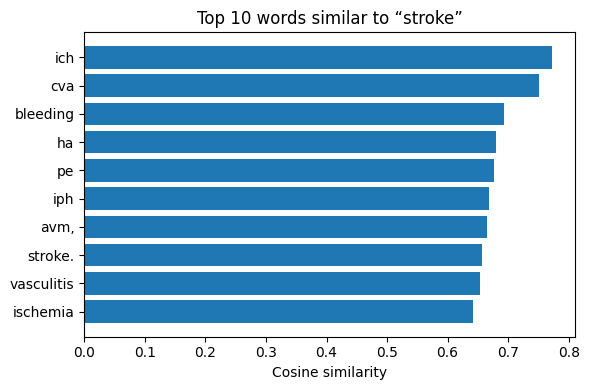

In [3]:
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt

sentences = [text.split() for text in df_notes['clean_text']]


w2v = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4,
    epochs=5
)

seed = "stroke"
neighbors = w2v.wv.most_similar(seed, topn=10)
words, sims = zip(*neighbors)

plt.figure(figsize=(6,4))
plt.barh(words, sims)
plt.xlabel("Cosine similarity")
plt.title(f"Top 10 words similar to “{seed}”")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

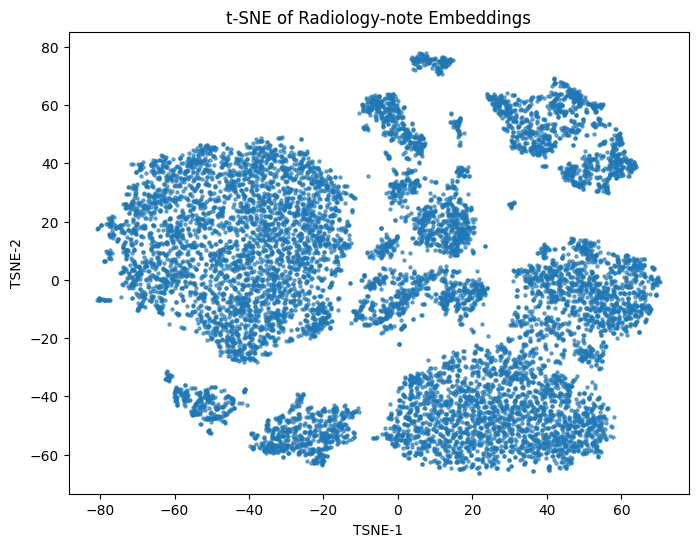

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def avg_vec(tokens):
    vecs = [w2v.wv[w] for w in tokens if w in w2v.wv]
    return np.mean(vecs,axis=0) if vecs else np.zeros(w2v.vector_size)

X = np.vstack(df_notes['clean_text'].str.split().map(avg_vec).values)
X2 = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X2[:,0], X2[:,1], s=5, alpha=0.6)
plt.title("t-SNE of Radiology-note Embeddings")
plt.xlabel("TSNE-1"); plt.ylabel("TSNE-2")
plt.show()


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model     = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

def get_bert_emb(text):
    inputs = tokenizer(text, truncation=True, padding="max_length", max_length=256, return_tensors="pt")
    with torch.no_grad():
        out = model(**inputs).last_hidden_state.mean(dim=1).squeeze().numpy()
    return out

sample = df_notes['clean_text'].sample(5000, random_state=0).tolist()
Emb = np.vstack([get_bert_emb(t) for t in sample])
Emb2 = TSNE(n_components=2, perplexity=30, random_state=0).fit_transform(Emb)

plt.figure(figsize=(8,6))
plt.scatter(Emb2[:,0], Emb2[:,1], s=5, alpha=0.6)
plt.title("t-SNE of ClinicalBERT Note Embeddings (5k sample)")
plt.show()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]